In [18]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## `group`

In [5]:
marvel = Table.read_table("https://github.com/fivethirtyeight/data/raw/master/comic-characters/marvel-wikia-data.csv")
marvel

page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,nan,Living Characters,4043,Aug-62,1962
7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,nan,Living Characters,3360,Mar-41,1941
64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,nan,Living Characters,3061,Oct-74,1974
1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,nan,Living Characters,2961,Mar-63,1963
2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,nan,Living Characters,2258,Nov-50,1950
2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,nan,Living Characters,2255,Nov-61,1961
2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,2072,Nov-61,1961
1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,2017,May-62,1962
29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,1955,Sep-63,1963
1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,nan,Living Characters,1934,Nov-61,1961


In [7]:
marvel.group('ALIGN')

ALIGN,count
Bad Characters,6720
Good Characters,4636
Neutral Characters,2208
nan,2812


In [6]:
marvel.group("name") # Probably useless

name,count
'Spinner (Earth-616),1
107 (Earth-616),1
11-Ball (Earth-616),1
115 (Legion Personality) (Earth-616),1
14 (Earth-616),1
181 (Legion Personality) (Earth-616),1
1X (Earth-616),1
2-D (Earth-616),1
2X (Earth-616),1
302 (Legion Personality) (Earth-616),1


## `group_barh`

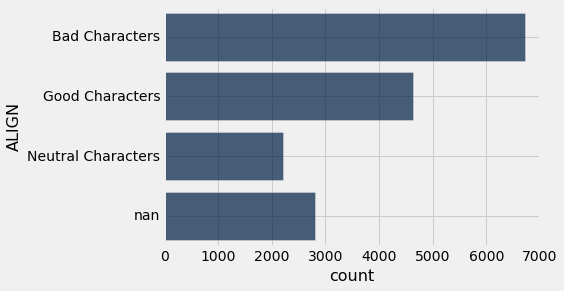

In [8]:
marvel.group_barh("ALIGN")

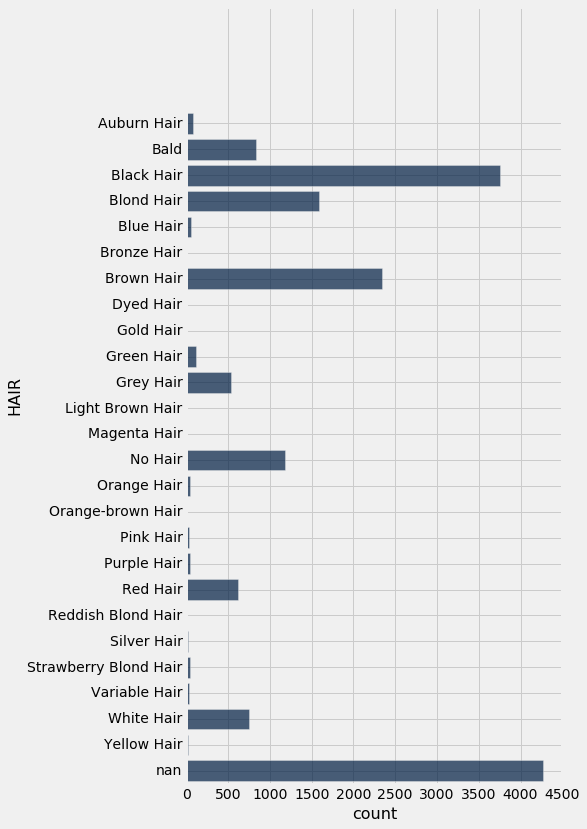

In [9]:
marvel.group_barh("HAIR")

## `barh`

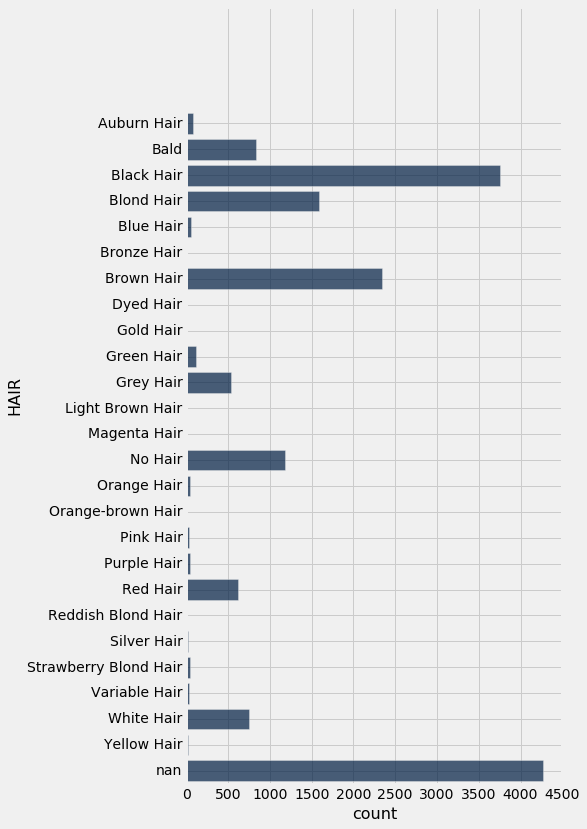

In [18]:
marvel.group("HAIR").barh("HAIR", "count")

In [25]:
by_hair = marvel.group("HAIR")
hair_percents = 100*by_hair.column("count") / sum(by_hair.column("count"))
with_hair_percents = by_hair.with_columns("percent", hair_percents)
with_hair_percents

HAIR,count,percent
Auburn Hair,78,0.476307
Bald,838,5.11724
Black Hair,3755,22.9299
Blond Hair,1582,9.66048
Blue Hair,56,0.341964
Bronze Hair,1,0.0061065
Brown Hair,2339,14.2831
Dyed Hair,1,0.0061065
Gold Hair,8,0.048852
Green Hair,117,0.71446


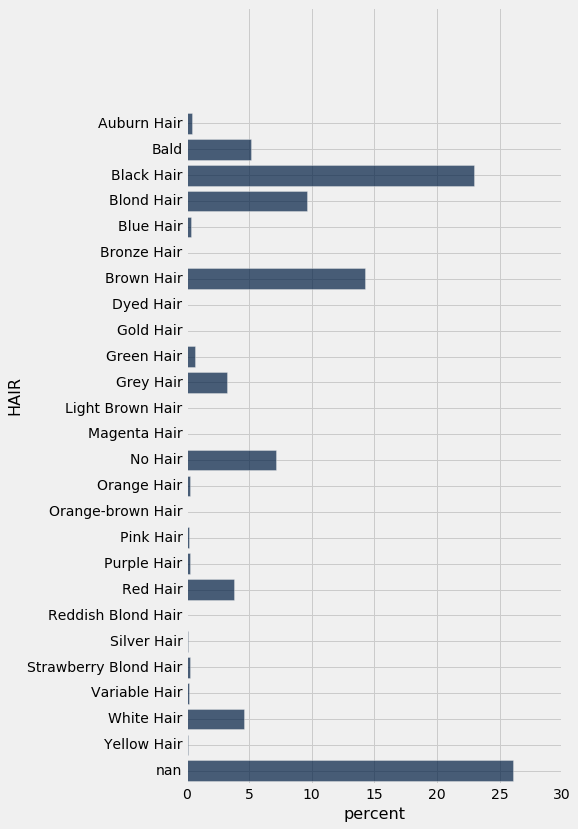

In [26]:
with_hair_percents.barh("HAIR", "percent")

## `sort`

In [30]:
with_hair_percents.sort("count")

HAIR,count,percent
Bronze Hair,1,0.0061065
Dyed Hair,1,0.0061065
Orange-brown Hair,3,0.0183195
Magenta Hair,5,0.0305325
Light Brown Hair,6,0.036639
Reddish Blond Hair,6,0.036639
Gold Hair,8,0.048852
Silver Hair,16,0.097704
Yellow Hair,20,0.12213
Pink Hair,31,0.189301


In [31]:
with_hair_percents.sort("count", descending=True)

HAIR,count,percent
nan,4264,26.0381
Black Hair,3755,22.9299
Brown Hair,2339,14.2831
Blond Hair,1582,9.66048
No Hair,1176,7.18124
Bald,838,5.11724
White Hair,754,4.6043
Red Hair,620,3.78603
Grey Hair,531,3.24255
Green Hair,117,0.71446


In [32]:
with_hair_percents.sort("percent", descending=True) # Same result

HAIR,count,percent
nan,4264,26.0381
Black Hair,3755,22.9299
Brown Hair,2339,14.2831
Blond Hair,1582,9.66048
No Hair,1176,7.18124
Bald,838,5.11724
White Hair,754,4.6043
Red Hair,620,3.78603
Grey Hair,531,3.24255
Green Hair,117,0.71446


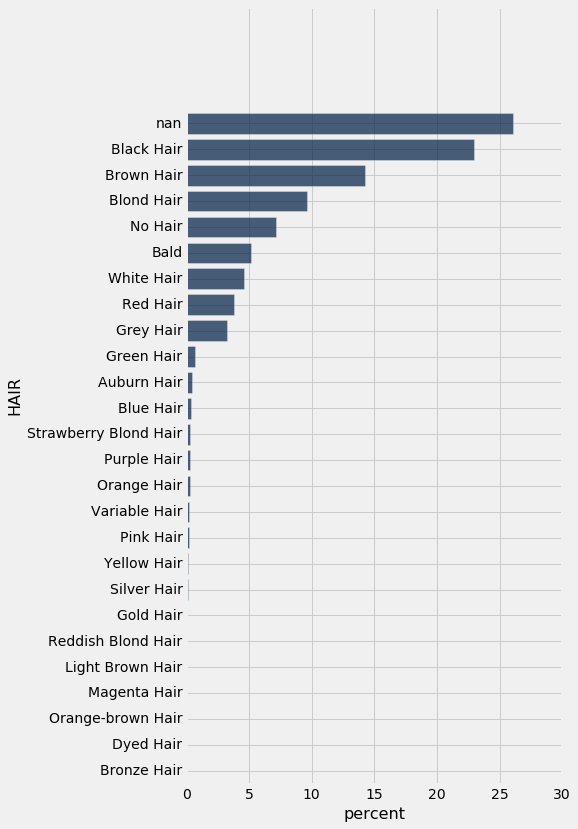

In [33]:
with_hair_percents.sort("count", descending=True).barh("HAIR", "percent")

## Histograms

In [5]:
top = Table.read_table('http://tinyurl.com/data8r-top-movies', sep=',')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [6]:
millions = top.with_column('Adjusted Gross', 
                           np.round(top.column("Gross (Adjusted)")/1e6, 2))
millions

Title,Studio,Gross,Gross (Adjusted),Year,Adjusted Gross
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015,906.72
Avatar,Fox,760507625,846120800,2009,846.12
Titanic,Paramount,658672302,1178627900,1997,1178.63
Jurassic World,Universal,652270625,687728000,2015,687.73
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012,668.87
The Dark Knight,Warner Bros.,534858444,647761600,2008,647.76
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999,785.72
Star Wars,Fox,460998007,1549640500,1977,1549.64
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015,465.68
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012,500.96


In [7]:
millions.bin("Adjusted Gross")

bin,Adjusted Gross count
322.26,112
465.813,52
609.366,15
752.919,10
896.472,3
1040.03,4
1183.58,2
1327.13,0
1470.68,1
1614.24,1


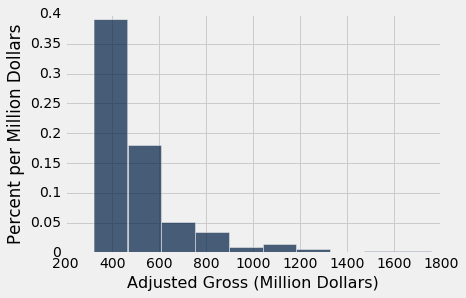

In [8]:
millions.hist('Adjusted Gross', unit="Million Dollars")

## Bad alternatives to histograms

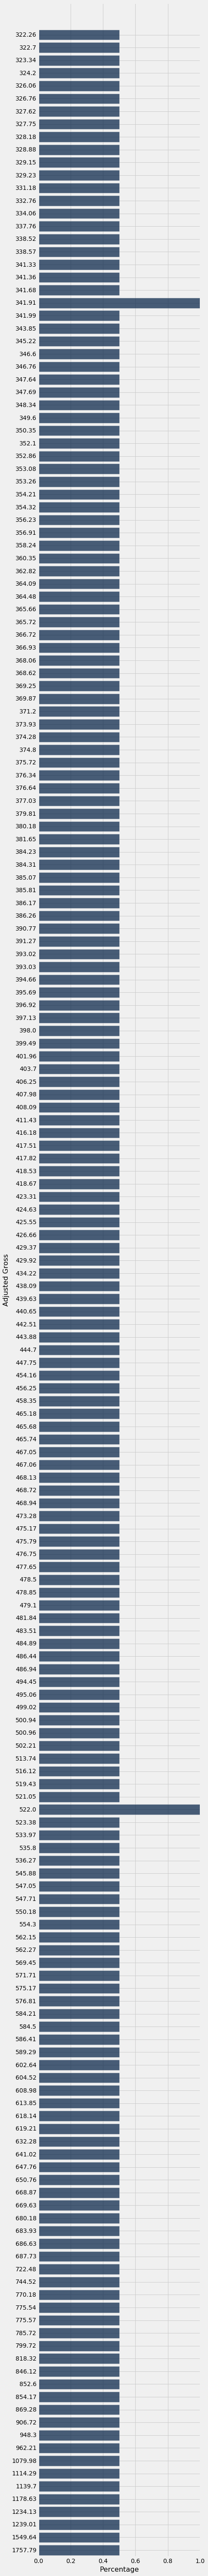

In [37]:
by_gross = millions.group('Adjusted Gross')
gross_percents = 100 * by_gross.column('count') / sum(by_gross.column('count'))
with_percents = by_gross.with_column("Percentage", gross_percents)
with_percents.barh('Adjusted Gross', 'Percentage')

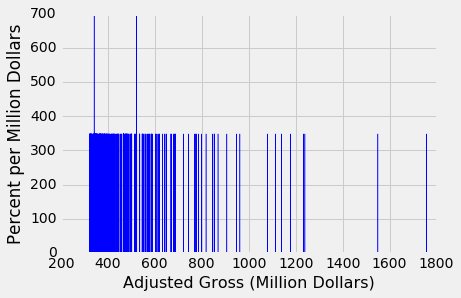

In [53]:
millions.hist('Adjusted Gross', unit="Million Dollars", bins=1000000, edgecolor='b')

## Binning

In [9]:
bin_width = 50

In [10]:
millions.bin('Adjusted Gross', bins=np.arange(300,2000+bin_width,bin_width))

bin,Adjusted Gross count
300,32
350,49
400,25
450,27
500,16
550,12
600,9
650,7
700,2
750,5


(200, 2000)

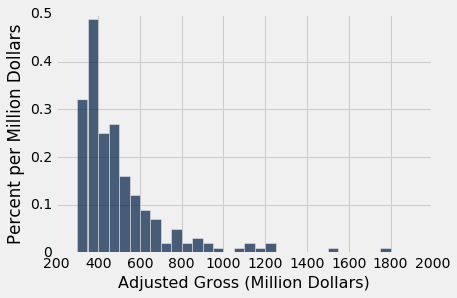

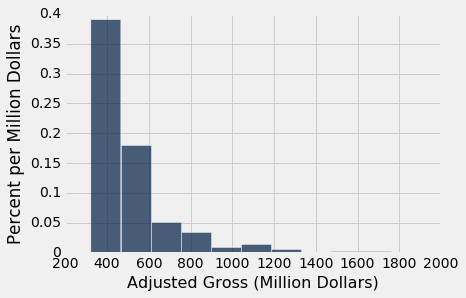

In [56]:
millions.hist('Adjusted Gross', bins=np.arange(300,2000+bin_width,bin_width), unit="Million Dollars")
millions.hist('Adjusted Gross', unit="Million Dollars") # For comparison
plots.xlim(200, 2000)

In [ ]:
# Discussion question: What is the rough proportion of movies with gross less than 600 million?
# Less than 2000?  So what is the total area of the bars?

## Another example

In [11]:
health = Table.read_table('https://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv')
health

HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
16,1,2,1,33.36,8,16,74,260
20,1,1,1,26.54,7,14,70,185
69,1,2,2,32.13,7,9,61,170
87,1,1,1,26.62,8,14,68,175
88,1,1,2,27.13,8,13,66,168
99,1,1,2,99.99,98,12,98,998
101,1,1,1,99.99,6,13,99,172
122,1,1,1,24.39,7,12,70,170
129,1,2,2,24.47,7,16,65,147
134,1,2,2,25.38,7,18,64,148


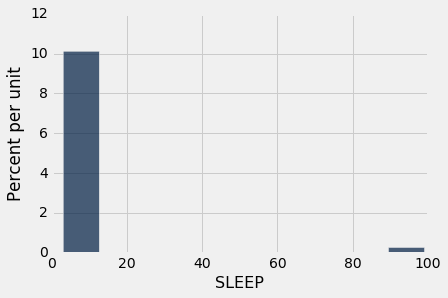

In [12]:
health.hist("SLEEP")

## `where`

In [14]:
health_cleaned = health.where("SLEEP", are.below(24))

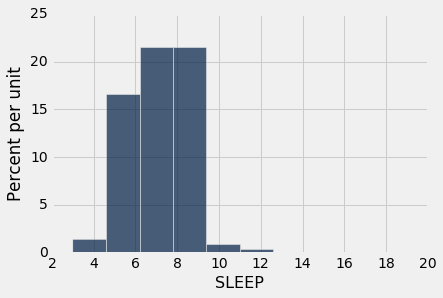

In [15]:
health_cleaned.hist("SLEEP")

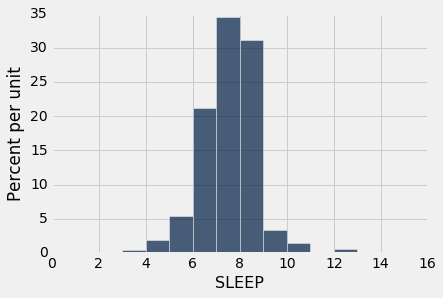

In [16]:
health_cleaned.hist("SLEEP", bins=np.arange(0, 16, 1))

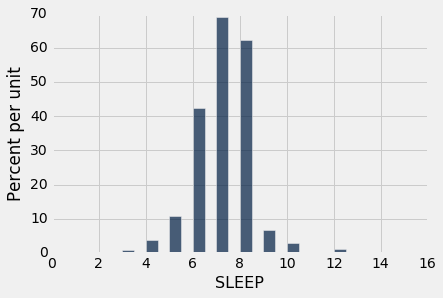

In [17]:
health_cleaned.hist("SLEEP", bins=np.arange(0, 16, .5))

In [67]:
marvel.where("APPEARANCES", are.above(500))

page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,nan,Living Characters,4043,Aug-62,1962
7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,nan,Living Characters,3360,Mar-41,1941
64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,nan,Living Characters,3061,Oct-74,1974
1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,nan,Living Characters,2961,Mar-63,1963
2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,nan,Living Characters,2258,Nov-50,1950
2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,nan,Living Characters,2255,Nov-61,1961
2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,2072,Nov-61,1961
1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,2017,May-62,1962
29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,nan,Living Characters,1955,Sep-63,1963
1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,nan,Living Characters,1934,Nov-61,1961


In [66]:
marvel.where("SEX", are.not_contained_in(make_array("Male Characters", "Female Characters", "nan")))

page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
2042,Loki Laufeyson (Earth-616),\/Loki_Laufeyson_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532,Aug-49,1949
18186,Venom (Symbiote) (Earth-616),\/Venom_(Symbiote)_(Earth-616),Known to Authorities Identity,Neutral Characters,Variable Eyes,No Hair,Agender Characters,nan,Living Characters,348,May-84,1984
57175,Carnage (Symbiote) (Earth-616),\/Carnage_(Symbiote)_(Earth-616),Public Identity,Bad Characters,White Eyes,No Hair,Agender Characters,nan,Living Characters,61,Mar-92,1992
1292,Captain Universe (Earth-616),\/Captain_Universe_(Earth-616),Secret Identity,Good Characters,Variable Eyes,Variable Hair,Agender Characters,nan,Living Characters,54,Aug-79,1979
23853,Xavin (Earth-616),\/Xavin_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Genderfluid Characters,Genderfluid Characters,Living Characters,33,Oct-05,2005
7995,Living Brain (Earth-616),\/Living_Brain_(Earth-616),nan,Neutral Characters,Yellow Eyes,No Hair,Agender Characters,nan,Living Characters,32,Jan-64,1964
607100,Emily Preston (Earth-616),\/Emily_Preston_(Earth-616),No Dual Identity,Good Characters,Brown Eyes,Bald,Agender Characters,nan,Living Characters,28,Jan-13,2013
442178,Toxin (Symbiote) (Earth-616),\/Toxin_(Symbiote)_(Earth-616),nan,Neutral Characters,Variable Eyes,No Hair,Agender Characters,nan,Living Characters,25,Oct-04,2004
573762,H.E.L.E.N. (Earth-616),\/H.E.L.E.N._(Earth-616),No Dual Identity,Good Characters,nan,nan,Agender Characters,nan,Living Characters,24,Jan-13,2013
37431,Centrally Located Organic Computer (Earth-616),\/Centrally_Located_Organic_Computer_(Earth-616),nan,Good Characters,nan,nan,Agender Characters,nan,Living Characters,23,Jan-01,2001


In [60]:
millions.where('Adjusted Gross', are.below(600))

Title,Studio,Gross,Gross (Adjusted),Year,Adjusted Gross
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015,465.68
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012,500.96
The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013,444.7
Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006,562.27
Toy Story 3,Buena Vista (Disney),415004880,454156300,2010,454.16
Iron Man 3,Buena Vista (Disney),409013994,424632700,2013,424.63
The Hunger Games,Lionsgate,408010692,442510400,2012,442.51
Transformers: Revenge of the Fallen,Paramount/Dreamworks,402111870,468938100,2009,468.94
Frozen,Buena Vista (Disney),400738009,426656900,2013,426.66
Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011,417.51


In [57]:
millions.where('Adjusted Gross', are.below(600)).num_rows

161

In [58]:
millions.num_rows

200

In [59]:
millions.where('Adjusted Gross', are.below(600)).num_rows / millions.num_rows

0.805